<a href="https://colab.research.google.com/github/andreventura02/Data_science/blob/master/Determinando_a_qualidade_do_vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://fontmeme.com/permalink/200514/1aeec56fe0984855673e3428f6009ddd.png" height="100px"></p> 

#Determinando a qualidade do vinho através de Machine Learning

Em nosso projeto, iremos determinar a qualidade de um vinho baseada em seus testes físico-qumícos, nosso objetivo é determinar a qualidade de um vinho mesmo não sendo um Sommelier de vinhos.

#Importando os dados

Usaremos um dataset disponibilizado pela UCI Machine Learning, contendo dados sobre os vinhos portugueses. Todos os dados estão disponiveis nessa [pagina](https://archive.ics.uci.edu/ml/datasets/wine+quality).

In [0]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
#Nomeando os datasets
wine_red = pd.read_csv('winequality-red.csv', sep = ';')
wine_white = pd.read_csv('winequality-white.csv', sep =';')

##Análise exploratória

In [0]:
#Observando o dataset de vinho tinto
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
#Verificando valores nulos
wine_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Verificaremos a distribuição das notas para termos certeza que os nossos dados estão balanceados.

In [0]:
#Verificando a distribuição da qualidade
fig = px.histogram(wine_red,x='quality')
fig.show()

Criamos um heatmap de correlção para observarmos as relções entre as variáveis.

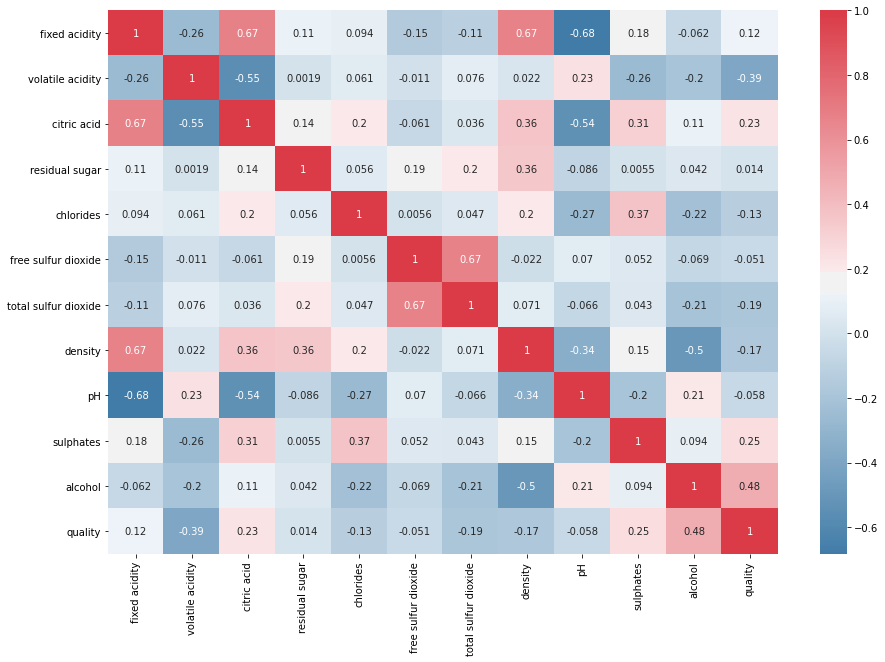

In [0]:
corr = wine_red.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))

Agora que observamos as relções e distribuições de notas, iremos dividi-las em Boa(acima ou igual a nota 7) e Ruim(abaixo de nota 7)

#Preparando os dados

In [0]:
#Tranformando a qualidade
wine_red['goodquality'] = [1 if x >= 7 else 0 for x in wine_red['quality']]

In [0]:
#Determinando as variáveis x e y
x = wine_red[['alcohol','sulphates', 'citric acid', 'fixed acidity', 'residual sugar']]
y = wine_red['goodquality']


#Modelo de Machine Learning

In [0]:
#Dividindo entre teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [0]:
#Treinando o modelo e medindo seu Score
model2 = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
model2.fit(x_train, y_train)
predict_red = model2.predict(x_test)

print(classification_report(y_test, predict_red))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       355
           1       0.68      0.62      0.65        45

    accuracy                           0.93       400
   macro avg       0.82      0.79      0.80       400
weighted avg       0.92      0.93      0.92       400



Em nosso modelo de RandomForestClassifier conseguimos uma acurácia de 93%, excelente para um primeiro modelo.

#Vinho Branco

Repitimos as mesmas etapas do processo no dataset de Vinho Branco.

In [0]:
#Observando o dataset de Vinho Branco
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
#Verificando valores nulos
wine_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
#Verificando a distribuição da qualidade
fig = px.histogram(wine_white,x='quality')
fig.show()

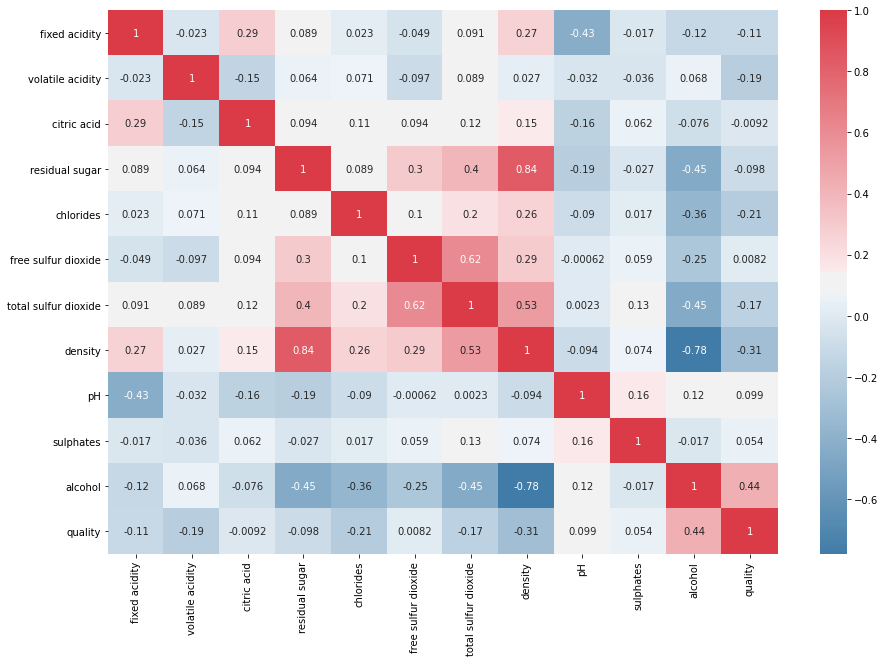

In [0]:
corr = wine_white.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [0]:
#Tranformando a qualidade
wine_white['goodquality'] = [1 if x >= 7 else 0 for x in wine_white['quality']]

In [0]:
#Definindo as variaveis x e y
x2 = wine_white[['alcohol','sulphates', 'pH', 'free sulfur dioxide']]
y2 = wine_white['goodquality']

In [0]:
#Dividindo entre treino e teste
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=0)


In [0]:
#Usaremos o RandomForestClassifier novamente, visto que ele cumpriu bem sua função no primeiro dataset.
model2.fit(x_train2,y_train2)
predict_white = model2.predict(x_test2)

print(classification_report(y_test2, predict_white))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       963
           1       0.71      0.55      0.62       262

    accuracy                           0.86      1225
   macro avg       0.80      0.74      0.77      1225
weighted avg       0.85      0.86      0.85      1225



In [0]:
accuracy_red = np.mean(y_test==predict_red)
accuracy_white = np.mean(y_test2==predict_white)

In [0]:
print("Acuracia vinho vermelho:%.2f" % (accuracy_red))
print("Acuracia vinho branco:%.2f" %(accuracy_white))

Acuracia vinho vermelho:0.93
Acuracia vinho branco:0.86
